![crack](https://cdn.radiofrance.fr/s3/cruiser-production/2021/01/1888eb1e-654a-4ab4-835b-581cf76844f7/1200x680_titanic.jpg)

# Titanic 

Let's start using classifications on a very popular dataset: **Titanic**. 

We're going to make an algorithm together that will try to predict who will survive to the titanic crash based on many variables.

Your goal will be to: 

1. Preprocess the data 
2. Create a classification algorithm 

Happy Coding!

## Step 1 - Import Data 🤹‍♀️

- Import usual librairies

In [1]:
# Import
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

- Import `titanic.csv` and visualize dataset

In [2]:
df = pd.read_csv("/Users/antoinekrajnc/JEDHA Dropbox/Data_Sciences/ESSENTIALS_PROGRAM/V3/M04-Machine_learning/D02-Machine_learning_classifications/01-Exercises/src/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Remove `PassengerId`, `Name`, `Ticket`, `Cabin` columns from the dataset

In [3]:
df = df.loc[:, ["Survived", 
                "Pclass", 
                "Sex", 
                "Age", 
                "SibSp", 
                "Parch",
                "Fare",
                "Embarked"]]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Step 2 - EDA 📊

- Visualize `Sex` and `Survived`

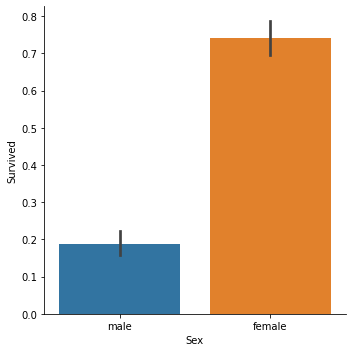

In [4]:
sns.catplot(x="Sex", y="Survived",data=df, kind="bar")

- Visualize `SibSp` and `Survived`

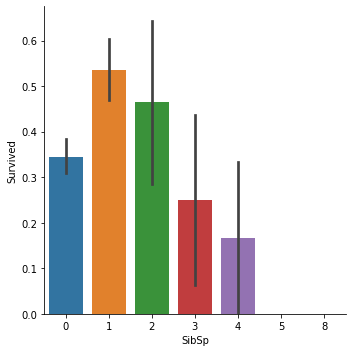

In [5]:
sns.catplot(x="SibSp", y="Survived",data=df, kind="bar")

- Visualize `Pclass` and `Survived`

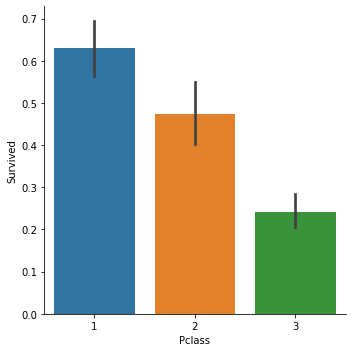

In [6]:
sns.catplot(x="Pclass", y="Survived",data=df, kind="bar")

- Visualize `Embarked` and `Survived`

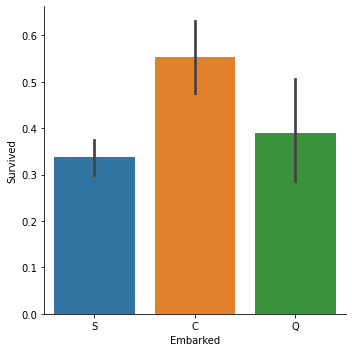

In [7]:
sns.catplot(x="Embarked", y="Survived",data=df, kind="bar")

- Visualize `Parch` and `Survived`

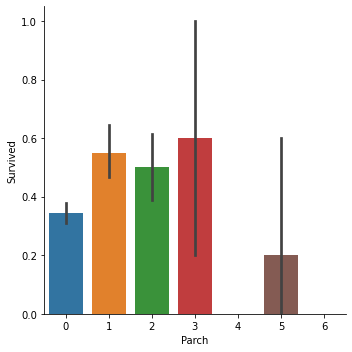

In [8]:
sns.catplot(x="Parch", y="Survived",data=df, kind="bar")

- Visualize `Fare` and `Survived`

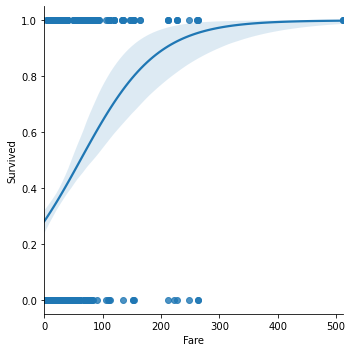

In [9]:
sns.lmplot(x="Fare", y="Survived",data=df, logistic=True)

* Show your dataset main statistics

In [10]:
df.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


- Let's take a look to missing values

In [11]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

## Step 3 - Preprocessing 🍳

- Split your dataset by $X$ and $y$

In [12]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list = df.columns[1:]

X = df.loc[:,features_list] # We add feature_list into our loc 
y = df.loc[:,"Survived"] # We set "Profit" as the target variable

print("...Done.")
print()

Separating target variable from features...
...Done.



- Split your data in train and test sets

In [13]:
# Divide dataset Train set & Test set 
print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print("...Done.")   

Splitting dataset into train set and test set...
...Done.


* Deal with missing values 
    * you can replace missing values in numerical columns by the median 
    * you can replace missing values in categorical columns by a new category called "*Unknown*"
    * Check out [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer) documentation to do so 😉

In [14]:
# Copy X_train to avoid caveats
X_train = X_train.copy()

# Create an imputer for numerical columns 
numerical_imputer = SimpleImputer(strategy="median")

# Apply it on "Age" column. Careful, we used X[["Age"]] on purpose to get a 2D array instead of 1D
X_train[["Age"]] = numerical_imputer.fit_transform(X_train[["Age"]])

# Create categorical imputer 
categorical_imputer = SimpleImputer(strategy="constant", fill_value="Unknown") # We can use strategy="constant"
                                                                                # along with fill_value 
                                                                                # to replace NaN 
                                                                                # by whatever is inside fill_value

# Apply it on "Age" column. Careful, we used X[["Embarked"]] on purpose to get a 2D array instead of 1D
X_train[["Embarked"]] = categorical_imputer.fit_transform(X_train[["Embarked"]])

X_train.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

- Make all the required preprocessings on the train set

In [15]:
# Encoding categorical features and standardizing numeric features
print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables

# This is a list comprehension (too complex for students)
#numeric_features = [i  for i,item in enumerate(X_train.columns) if item != "Sex" and item !="Embarked" ]

numeric_features = [0, 2, 3, 4, 5] 
numeric_transformer = StandardScaler()


categorical_features = [1, 6] 
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

#### X_train BEFORE preprocessing ####
     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
140       3  female  29.0      0      2  15.2458        C
439       2    male  31.0      0      0  10.5000        S
817       2    male  31.0      1      1  37.0042        C
378       3    male  20.0      0      0   4.0125        C
491       3    male  21.0      0      0   7.2500        S

Encoding categorical features and standardizing numerical features...
...Done.
#### X_train AFTER preprocessing ####
[[ 1.          0.          1.          0.          0.          0.
   0.81925059 -0.04567633 -0.46445234  1.95926403 -0.33167904]
 [ 0.          1.          0.          0.          1.          0.
  -0.38096838  0.10718641 -0.46445234 -0.47741019 -0.42640542]
 [ 0.          1.          1.          0.          0.          0.
  -0.38096838  0.10718641  0.41270964  0.74092692  0.10261958]
 [ 0.          1.          1.          0.          0.          0.
   0.81925059 -0.73355864 -0.46445234 -0.4

## Build your model 🏋️‍♂️

- Create your Logistic Regression model

In [16]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


- Evaluate it (don't forget to preprocess X_test)

In [17]:
## Testing pipeline ###
print("--- Testing pipeline ---")

# Copy X_train to avoid caveats
X_test = X_test.copy()

# Imputing 
print("Imputing missing values")
X_test[["Age"]] = numerical_imputer.transform(X_test[["Age"]])
X_test[["Embarked"]] = categorical_imputer.transform(X_test[["Embarked"]])
print()

# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test = feature_encoder.transform(X_test)

print("...Done.")
print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()

# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()


print("Final accuracy score on Test set: ",classifier.score(X_test, y_test))

--- Testing pipeline ---
Imputing missing values

Standardizing numerical features...
     Pclass     Sex   Age  SibSp  Parch      Fare Embarked
495       3    male  29.0      0      0   14.4583        C
648       3    male  29.0      0      0    7.5500        S
278       3    male   7.0      4      1   29.1250        Q
31        1  female  29.0      1      0  146.5208        C
255       3  female  29.0      0      2   15.2458        C
..      ...     ...   ...    ...    ...       ...      ...
780       3  female  13.0      0      0    7.2292        C
837       3    male  29.0      0      0    8.0500        S
215       1  female  31.0      1      0  113.2750        C
833       3    male  23.0      0      0    7.8542        S
372       3    male  19.0      0      0    8.0500        S

[179 rows x 7 columns]

...Done.
[[ 0.          1.          1.          0.          0.          0.
   0.81925059 -0.04567633 -0.46445234 -0.47741019 -0.34739758]
 [ 0.          1.          0.          0.  

- Look at your model scores on train and test

In [18]:
print("Train score: ", classifier.score(X_train, y_train))
print("Test score: ", classifier.score(X_test, y_test))

Train score:  0.7991573033707865
Test score:  0.7988826815642458


- What can you say about it ?

In [19]:
# No overfitting ! 

- Create the confusion matrix with `plot_confusion_matrix`

--- Assessment of performances ---


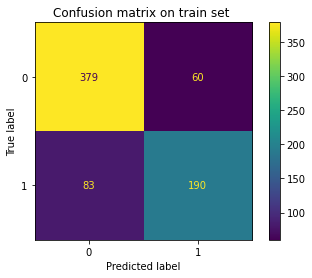

accuracy-score on train set :  0.7991573033707865


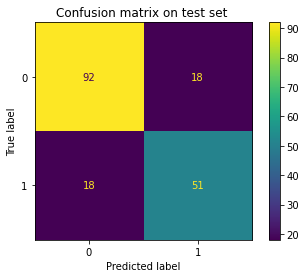

accuracy-score on test set :  0.7988826815642458


In [20]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = plot_confusion_matrix(classifier, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = plot_confusion_matrix(classifier, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

- Create a dataframe with features importance

## Bonus - Feature Importance 🏄‍♂️

* Now harder, try to visualize the coefficients of your model and therefore deduce a feature importance ranking

In [36]:
[item for array in categorical_column_names for item in array]

['female', 'male', 'C', 'Q', 'S', 'Unknown']

coefficients are:  [[ 1.31216799 -1.30440821 -0.02049599  0.1367092  -0.31241496  0.20396153
  -0.8673164  -0.55568494 -0.41273956 -0.04121682  0.08101373]]
Constant is:  [-0.03034283]

All transformers are:  [('cat', OneHotEncoder(), [1, 6]), ('num', StandardScaler(), [0, 2, 3, 4, 5])]

One Hot Encoder transformer is:  OneHotEncoder()

Categorical columns are:  ['female' 'male' 'C' 'Q' 'S' 'Unknown']

numerical columns are:  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

All column names are:  ['female' 'male' 'C' 'Q' 'S' 'Unknown' 'Pclass' 'Age' 'SibSp' 'Parch'
 'Fare']



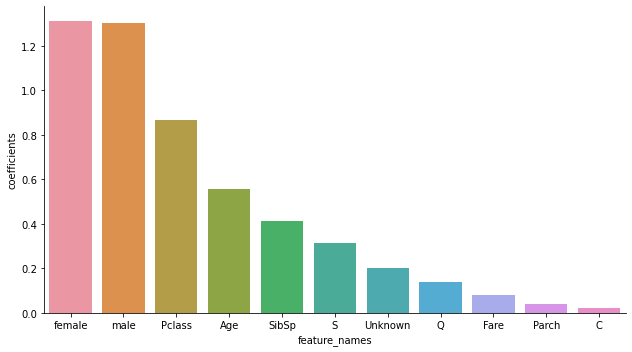

In [39]:
# Check coefficients 

print("coefficients are: ", classifier.coef_) 
print("Constant is: ", classifier.intercept_)
print()

# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)
print()

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])
print()

# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_

# CAREFUL HERE, we have a list of two arrays. We can use list comprehensions OR np.append() 
# General complex method
# flat_cat_features = [item for array in categorical_column_names for item in array]

# Easy but manual method
flat_cat_features = np.append(categorical_column_names[0], categorical_column_names[1])

print("Categorical columns are: ", flat_cat_features) 
print()

# Print numerical columns
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)
print()

# Append all columns 
all_column_names = np.append(flat_cat_features, numerical_column_names)
print("All column names are: ",all_column_names)
print()

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":classifier.coef_.squeeze() # CAREFUL HERE. We need to access first index of our list because 
                                            # Data need to be 1 dimensional
                                            # That's what .squeeze()
})


# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph